# importing required liberaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler,LabelEncoder,OrdinalEncoder,power_transform
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('temperature.csv')
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


# Total number of rows =7752 and columns =25

In [3]:
df.shape

(7752, 25)

# checking null values

In [5]:
df.isnull().sum()/len(df)*100

station             0.025800
Date                0.025800
Present_Tmax        0.902993
Present_Tmin        0.902993
LDAPS_RHmin         0.967492
LDAPS_RHmax         0.967492
LDAPS_Tmax_lapse    0.967492
LDAPS_Tmin_lapse    0.967492
LDAPS_WS            0.967492
LDAPS_LH            0.967492
LDAPS_CC1           0.967492
LDAPS_CC2           0.967492
LDAPS_CC3           0.967492
LDAPS_CC4           0.967492
LDAPS_PPT1          0.967492
LDAPS_PPT2          0.967492
LDAPS_PPT3          0.967492
LDAPS_PPT4          0.967492
lat                 0.000000
lon                 0.000000
DEM                 0.000000
Slope               0.000000
Solar radiation     0.000000
Next_Tmax           0.348297
Next_Tmin           0.348297
dtype: float64

# checking data type

In [6]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [10]:
df['Date']=pd.to_datetime(df['Date'])

In [14]:
df['Month']=df['Date'].dt.month

In [15]:
df['Day']=df['Date'].dt.day

In [16]:
df['Year']=df['Date'].dt.year

In [17]:
df = df.drop('Date',axis=1)

In [19]:
df

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Month,Day,Year
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2,6.0,30.0,2013.0
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5,6.0,30.0,2013.0
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9,6.0,30.0,2013.0
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3,6.0,30.0,2013.0
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5,6.0,30.0,2013.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1,8.0,30.0,2017.0
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8,8.0,30.0,2017.0
7749,25.0,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,...,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4,8.0,30.0,2017.0
7750,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3,NaN,NaN,NaN


In [20]:
df.isnull().sum()/len(df)*100

station             0.025800
Present_Tmax        0.902993
Present_Tmin        0.902993
LDAPS_RHmin         0.967492
LDAPS_RHmax         0.967492
LDAPS_Tmax_lapse    0.967492
LDAPS_Tmin_lapse    0.967492
LDAPS_WS            0.967492
LDAPS_LH            0.967492
LDAPS_CC1           0.967492
LDAPS_CC2           0.967492
LDAPS_CC3           0.967492
LDAPS_CC4           0.967492
LDAPS_PPT1          0.967492
LDAPS_PPT2          0.967492
LDAPS_PPT3          0.967492
LDAPS_PPT4          0.967492
lat                 0.000000
lon                 0.000000
DEM                 0.000000
Slope               0.000000
Solar radiation     0.000000
Next_Tmax           0.348297
Next_Tmin           0.348297
Month               0.025800
Day                 0.025800
Year                0.025800
dtype: float64

In [22]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Month,Day,Year
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000,7750.000000,7750.000000,7750.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220,7.080645,16.370968,2015.000000
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,...,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613,2.238364,8.241331,1.414305
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000,1.000000,7.000000,2013.000000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,...,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000,7.000000,8.000000,2014.000000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000,7.000000,16.000000,2015.000000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,...,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000,8.000000,24.000000,2016.000000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000,12.000000,31.000000,2017.000000


# filling Null values

In [32]:
df['station']=df['station'].fillna(df['station'].mean())

In [33]:
df['Present_Tmax']=df['Present_Tmax'].fillna(df['Present_Tmax'].mean())

In [34]:
df['Present_Tmin']=df['Present_Tmin'].fillna(df['Present_Tmin'].mean())

In [35]:
df['LDAPS_RHmin']=df['LDAPS_RHmin'].fillna(df['LDAPS_RHmin'].mean())

In [36]:
df['LDAPS_RHmax']=df['LDAPS_RHmax'].fillna(df['LDAPS_RHmax'].mean())

In [37]:
df['LDAPS_Tmax_lapse']=df['LDAPS_Tmax_lapse'].fillna(df['LDAPS_Tmax_lapse'].mean())

In [38]:
df['LDAPS_Tmin_lapse']=df['LDAPS_Tmin_lapse'].fillna(df['LDAPS_Tmin_lapse'].mean())

In [39]:
df['LDAPS_WS']=df['LDAPS_WS'].fillna(df['LDAPS_WS'].mean())

In [40]:
df['LDAPS_LH']=df['LDAPS_LH'].fillna(df['LDAPS_LH'].median())

In [41]:
df['LDAPS_CC1']=df['LDAPS_CC1'].fillna(df['LDAPS_CC1'].median())

In [42]:
df['LDAPS_CC2'].describe()

count    7677.000000
mean        0.356080
std         0.258061
min         0.000000
25%         0.140615
50%         0.312421
75%         0.558694
max         0.968353
Name: LDAPS_CC2, dtype: float64

In [43]:
df['LDAPS_CC2']=df['LDAPS_CC2'].fillna(df['LDAPS_CC2'].median())

In [44]:
df['LDAPS_CC3'].describe()

count    7677.000000
mean        0.318404
std         0.250362
min         0.000000
25%         0.101388
50%         0.262555
75%         0.496703
max         0.983789
Name: LDAPS_CC3, dtype: float64

In [45]:
df['LDAPS_CC3']=df['LDAPS_CC3'].fillna(df['LDAPS_CC3'].median())

In [46]:
df['LDAPS_CC4'].describe()

count    7677.000000
mean        0.299191
std         0.254348
min         0.000000
25%         0.081532
50%         0.227664
75%         0.499489
max         0.974710
Name: LDAPS_CC4, dtype: float64

In [47]:
df['LDAPS_CC4']=df['LDAPS_CC4'].fillna(df['LDAPS_CC4'].median())

In [48]:
df['LDAPS_PPT1'].describe()

count    7677.000000
mean        0.591995
std         1.945768
min         0.000000
25%         0.000000
50%         0.000000
75%         0.052525
max        23.701544
Name: LDAPS_PPT1, dtype: float64

In [49]:
df['LDAPS_PPT1']=df['LDAPS_PPT1'].fillna(df['LDAPS_PPT1'].mean())

In [50]:
df['LDAPS_PPT2'].describe()

count    7677.000000
mean        0.485003
std         1.762807
min         0.000000
25%         0.000000
50%         0.000000
75%         0.018364
max        21.621661
Name: LDAPS_PPT2, dtype: float64

In [51]:
df['LDAPS_PPT2']=df['LDAPS_PPT2'].fillna(df['LDAPS_PPT2'].mean())

In [52]:
df['LDAPS_PPT3'].describe()

count    7677.000000
mean        0.278200
std         1.161809
min         0.000000
25%         0.000000
50%         0.000000
75%         0.007896
max        15.841235
Name: LDAPS_PPT3, dtype: float64

In [53]:
df['LDAPS_PPT3']=df['LDAPS_PPT3'].fillna(df['LDAPS_PPT3'].mean())

In [54]:
df['LDAPS_PPT4'].describe()

count    7677.000000
mean        0.269407
std         1.206214
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000041
max        16.655469
Name: LDAPS_PPT4, dtype: float64

In [55]:
df['LDAPS_PPT4']=df['LDAPS_PPT4'].fillna(df['LDAPS_PPT4'].mean())

In [56]:
df['Next_Tmax']=df['Next_Tmax'].fillna(df['Next_Tmax'].mean())

In [57]:
df['Next_Tmin']=df['Next_Tmin'].fillna(df['Next_Tmin'].mean())

In [58]:
df['Month']=df['Month'].fillna(df['Month'].mean())

In [59]:
df['Day']=df['Day'].fillna(df['Day'].mean())

In [60]:
df['Year']=df['Year'].fillna(df['Year'].mean())

In [62]:
df.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'Month', 'Day', 'Year'],
      dtype='object')

# EDA

<AxesSubplot:xlabel='Month', ylabel='Next_Tmax'>

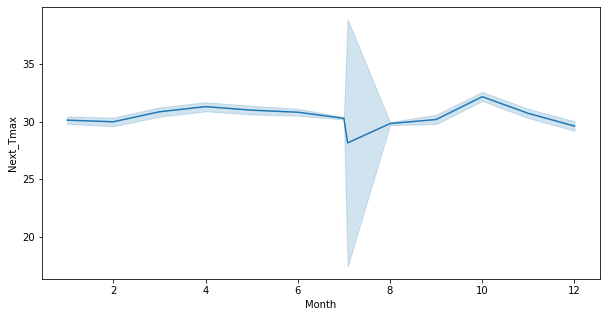

In [68]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Month',y='Next_Tmax',data=df)

The next-day maximum air temperature is high during April to June and again it is high on october.

<AxesSubplot:xlabel='Day', ylabel='Next_Tmax'>

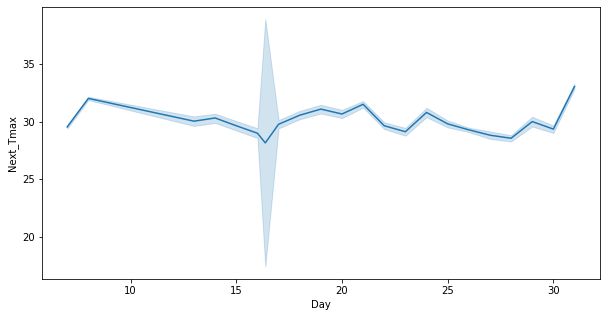

In [69]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Day',y='Next_Tmax',data=df)

Daywise the next-day maximum air temperature is keep on fluctuating 

<AxesSubplot:xlabel='Year', ylabel='Next_Tmax'>

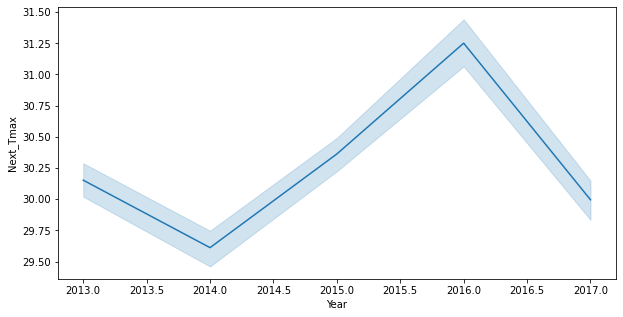

In [70]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Year',y='Next_Tmax',data=df)

The next-day maximum air temperature is keep on increasing every year from 2014 to 2016.

<AxesSubplot:xlabel='station', ylabel='Next_Tmax'>

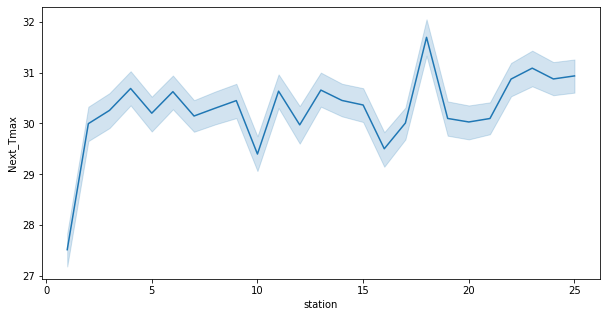

In [204]:
plt.figure(figsize=(10,5))
sns.lineplot(x='station',y='Next_Tmax',data=df)

As per above observation,weather station number 18 is doing good.

<AxesSubplot:xlabel='Present_Tmax', ylabel='Next_Tmax'>

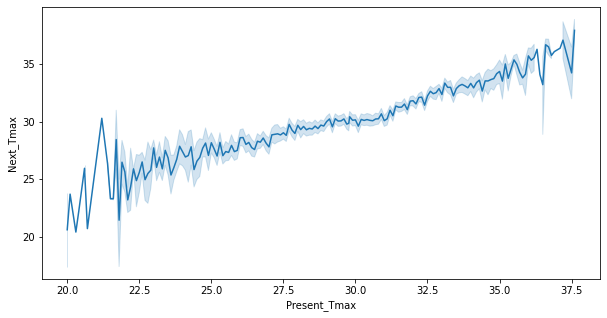

In [201]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Present_Tmax',y='Next_Tmax',data=df)

Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6

<AxesSubplot:xlabel='Present_Tmin', ylabel='Next_Tmax'>

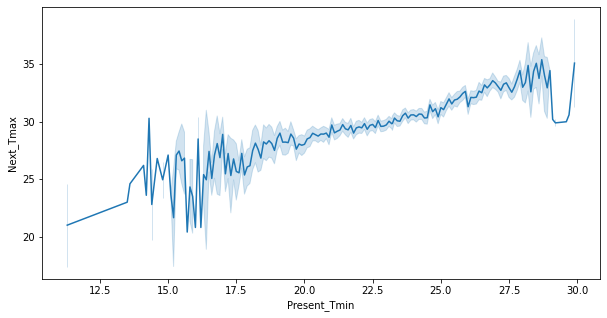

In [203]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Present_Tmin',y='Next_Tmax',data=df)

Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9

<AxesSubplot:xlabel='LDAPS_RHmin', ylabel='Next_Tmax'>

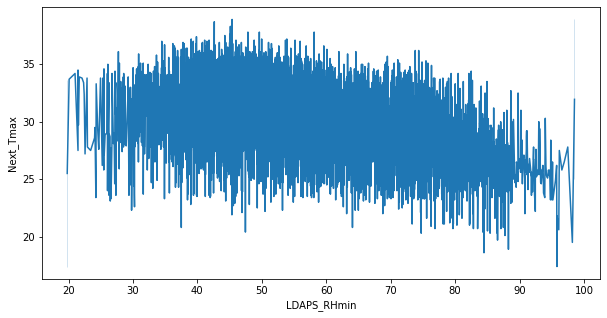

In [199]:
plt.figure(figsize=(10,5))
sns.lineplot(x='LDAPS_RHmin',y='Next_Tmax',data=df)

forecasting of next-day minimum relative humidity (%): 19.8 to 98.5

# Correlation

In [65]:
df.corr()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Month,Day,Year
station,1.000000e+00,0.112655,0.131646,-0.066733,-0.166984,0.069107,0.104758,0.005277,-0.133339,0.006917,...,-2.375015e-01,-1.187044e-01,-2.558297e-01,-9.006090e-02,-0.019001,0.107983,0.128293,-2.341773e-17,3.184397e-17,1.435563e-15
Present_Tmax,1.126554e-01,1.000000,0.618760,-0.204571,-0.301787,0.570129,0.623496,-0.121820,0.134251,-0.313187,...,-5.261489e-02,9.019776e-03,-1.871206e-01,-1.058092e-01,-0.025439,0.610348,0.622741,-1.150750e-03,-1.438070e-01,5.980007e-02
Present_Tmin,1.316462e-01,0.618760,1.000000,0.123143,-0.015140,0.464151,0.762993,-0.034675,-0.011276,0.081988,...,-7.847529e-02,-4.346122e-02,-2.502747e-01,-1.463390e-01,0.053578,0.471806,0.796670,-3.434226e-03,-1.082721e-01,3.739568e-02
LDAPS_RHmin,-6.673316e-02,-0.204571,0.123143,1.000000,0.579141,-0.564580,0.089476,0.294361,-0.070848,0.613696,...,8.709887e-02,-7.623712e-02,1.021149e-01,1.237439e-01,0.244080,-0.437898,0.095019,-5.394021e-02,-6.583711e-02,-2.044507e-03
LDAPS_RHmax,-1.669845e-01,-0.301787,-0.015140,0.579141,1.000000,-0.373404,-0.114143,0.135333,0.238547,0.436565,...,1.957977e-01,2.566694e-02,1.771681e-01,2.195989e-01,0.149261,-0.283738,-0.071997,-3.998985e-02,-1.300684e-02,-1.418320e-01
LDAPS_Tmax_lapse,6.910718e-02,0.570129,0.464151,-0.564580,-0.373404,1.000000,0.654021,-0.311996,0.048004,-0.438352,...,-4.209291e-02,9.066575e-02,-1.788954e-01,-1.623324e-01,0.047971,0.827189,0.586868,-2.168992e-02,-1.603214e-01,1.617217e-02
LDAPS_Tmin_lapse,1.047582e-01,0.623496,0.762993,0.089476,-0.114143,0.654021,1.000000,-0.130035,-0.134742,0.010898,...,-9.625683e-02,-2.670103e-02,-1.954553e-01,-1.858487e-01,0.159975,0.586983,0.880176,-2.749581e-02,-1.779545e-01,-4.693413e-03
LDAPS_WS,5.277000e-03,-0.121820,-0.034675,0.294361,0.135333,-0.311996,-0.130035,1.000000,0.006710,0.289388,...,3.665702e-02,-5.946615e-02,1.910530e-01,1.716286e-01,0.121759,-0.342729,-0.096576,-8.128770e-02,-2.913467e-02,-1.113577e-01
LDAPS_LH,-1.333385e-01,0.134251,-0.011276,-0.070848,0.238547,0.048004,-0.134742,0.006710,1.000000,-0.146920,...,1.332028e-01,2.581851e-02,5.512638e-02,8.676956e-02,-0.046553,0.155608,-0.056906,-2.365447e-02,-1.274332e-02,5.706961e-02
LDAPS_CC1,6.917419e-03,-0.313187,0.081988,0.613696,0.436565,-0.438352,0.010898,0.289388,-0.146920,1.000000,...,-8.128947e-03,-6.841543e-03,-1.408707e-02,-2.074738e-02,0.219264,-0.454855,-0.012807,-7.735718e-02,-2.091947e-02,-6.646482e-02


<AxesSubplot:>

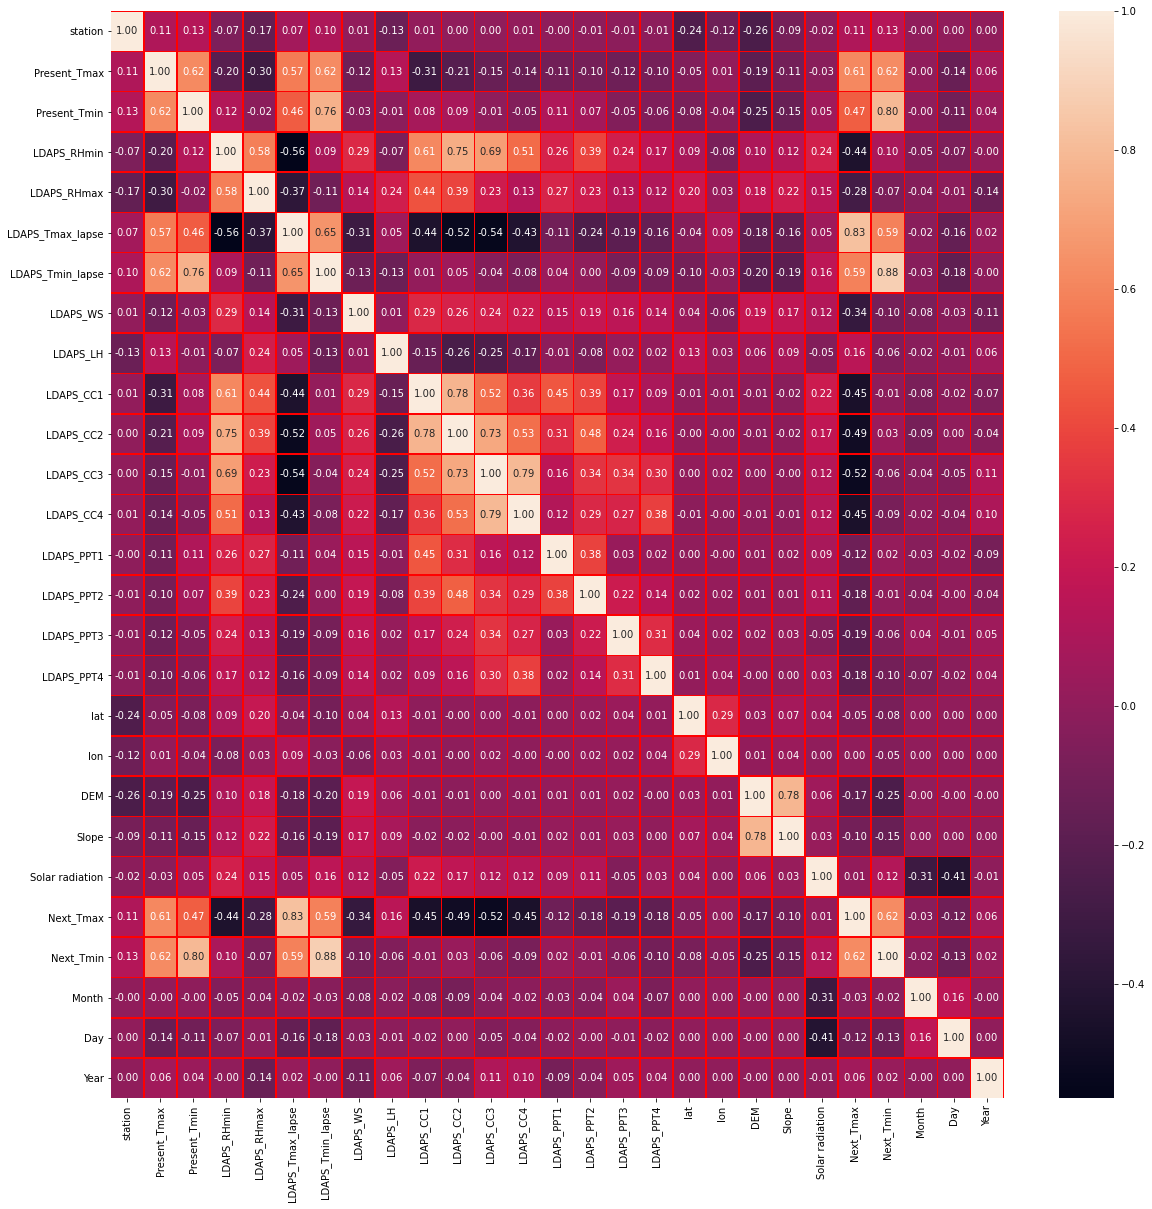

In [67]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,linecolor='r',linewidths=0.5,fmt='.2f')

station  has 11% positive correlation with Target column.

'Present_Tmax has 61% positive correlation with Target column.

'Present_Tmin has 47% positive correlation with Target column.

'LDAPS_RHmin has 44% negetive correlation with Target column.

'LDAPS_RHmax has 28% negetive correlation with Target column.

'LDAPS_Tmax_lapse has 83% positive correlation with Target column.

'LDAPS_Tmin_lapse has 59% positive correlation with Target column.

'LDAPS_WS has 34% negetive correlation with Target column.

'LDAPS_LH has 16% positive correlation with Target column.

'LDAPS_CC1 has 45% negetive correlation with Target column.

'LDAPS_CC2 has 49% negetive correlation with Target column.

'LDAPS_CC3 has 52% negetive correlation with Target column.

'LDAPS_CC4 has 45% negetive correlation with Target column.

'LDAPS_PPT1 has 12% negetive correlation with Target column.

'LDAPS_PPT2  has 18% negetive correlation with Target column.

'LDAPS_PPT3 has 19% negetive correlation with Target column.

'LDAPS_PPT4  has 18% negetive correlation with Target column.

'lat  has 5% negetive correlation with Target column.

'lon  has 0% positive correlation with Target column.

'DEM has 17% negetive correlation with Target column.

'Slope has 10% negetive correlation with Target column.

'Solar radiation has 1% negetive correlation with Target column.

'Next_Tmin has 62% positive correlation with Target column.

'Month has 3% negetive correlation with Target column.

'Day has 12% negetive correlation with Target column.

'Year has 6% negetive correlation with Target column.




# checking outlier

<AxesSubplot:>

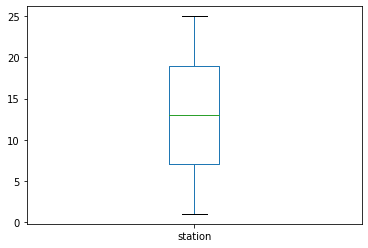

In [74]:
df['station'].plot.box()

As per above observation,there is no outlier.

<AxesSubplot:>

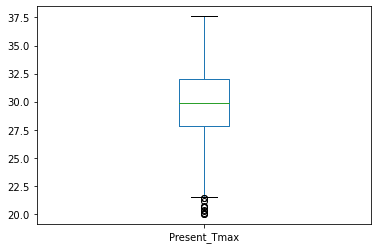

In [75]:
df['Present_Tmax'].plot.box()

As per above observation,there is an outlier.

<AxesSubplot:>

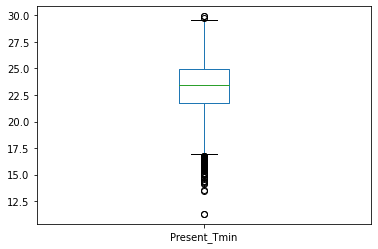

In [76]:
df['Present_Tmin'].plot.box()

As per above observation,there is an outlier.

<AxesSubplot:>

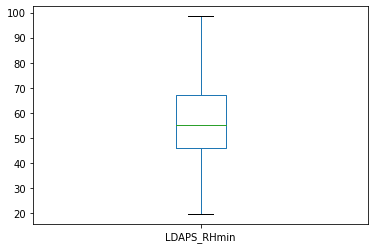

In [77]:
df['LDAPS_RHmin'].plot.box()

As per above observation,there is no outlier.

<AxesSubplot:>

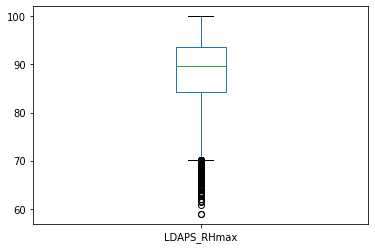

In [78]:
df['LDAPS_RHmax'].plot.box()

As per above observation,there is an outlier.

<AxesSubplot:>

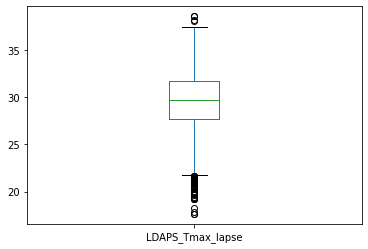

In [79]:
df['LDAPS_Tmax_lapse'].plot.box()

As per above observation,there is an outlier.

<AxesSubplot:>

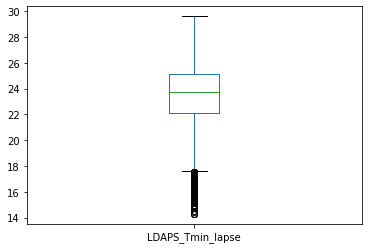

In [80]:
df['LDAPS_Tmin_lapse'].plot.box()

As per above observation,there is an outlier.

<AxesSubplot:>

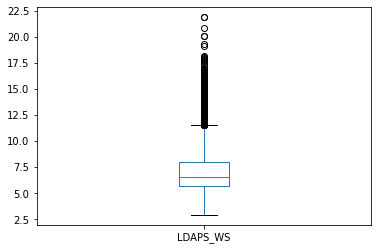

In [81]:
df['LDAPS_WS'].plot.box()

As per above observation,there is an outlier.

<AxesSubplot:>

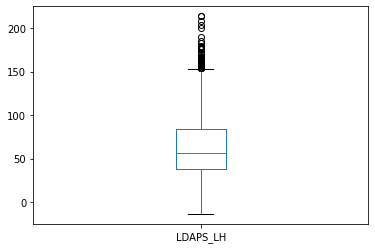

In [82]:
df['LDAPS_LH'].plot.box()

As per above observation,there is an outlier.

<AxesSubplot:>

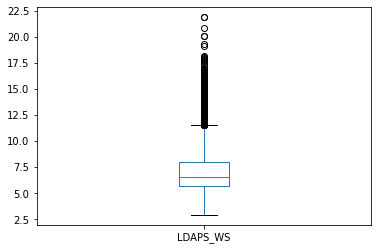

In [83]:
df['LDAPS_WS'].plot.box()

As per above observation,there is an outlier.

<AxesSubplot:>

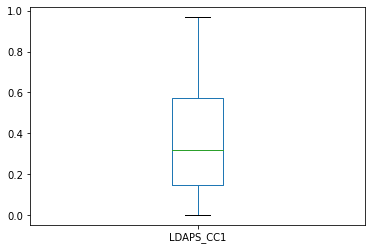

In [84]:
df['LDAPS_CC1'].plot.box()

As per above observation,there is no outlier.

<AxesSubplot:>

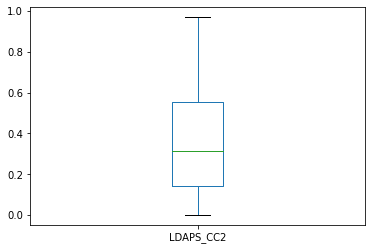

In [85]:
df['LDAPS_CC2'].plot.box()

As per above observation,there is no outlier.

<AxesSubplot:>

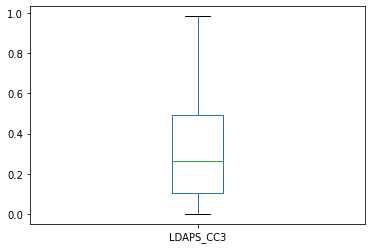

In [86]:
df['LDAPS_CC3'].plot.box()

As per above observation,there is no outlier.

<AxesSubplot:>

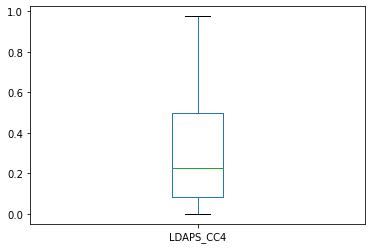

In [87]:
df['LDAPS_CC4'].plot.box()

As per above observation,there is no outlier.

<AxesSubplot:>

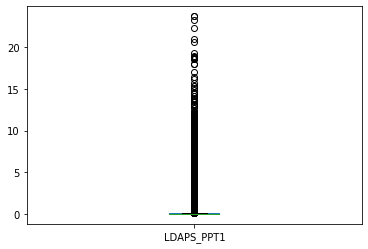

In [88]:
df['LDAPS_PPT1'].plot.box()

As per above observation,there is an outlier.

<AxesSubplot:>

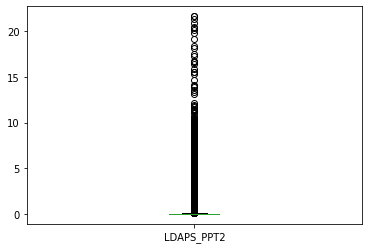

In [89]:
df['LDAPS_PPT2'].plot.box()

As per above observation,there is an outlier.

<AxesSubplot:>

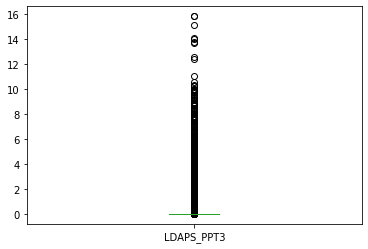

In [90]:
df['LDAPS_PPT3'].plot.box()

As per above observation,there is an outlier.

<AxesSubplot:>

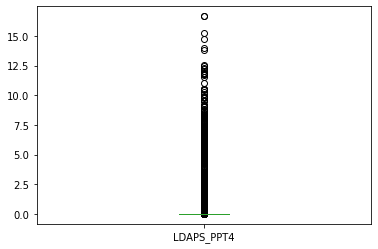

In [91]:
df['LDAPS_PPT4'].plot.box()

As per above observation,there is an outlier.

<AxesSubplot:>

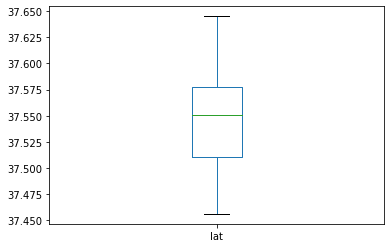

In [92]:
df['lat'].plot.box()

As per above observation,there is no outlier.

<AxesSubplot:>

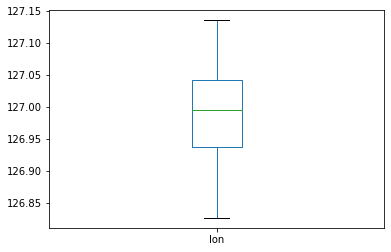

In [93]:
df['lon'].plot.box()

As per above observation,there is no outlier.

<AxesSubplot:>

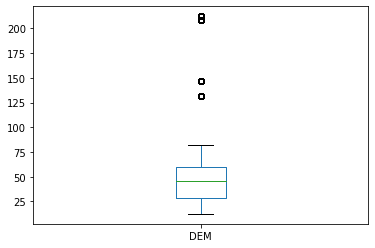

In [94]:
df['DEM'].plot.box()

As per above observation,there is an outlier.

<AxesSubplot:>

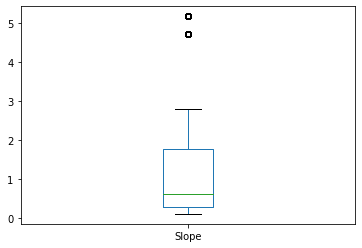

In [95]:
df['Slope'].plot.box()

As per above observation,there is an outlier.

<AxesSubplot:>

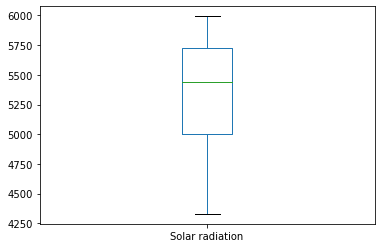

In [96]:
df['Solar radiation'].plot.box()

As per above observation,there is no outlier.

<AxesSubplot:>

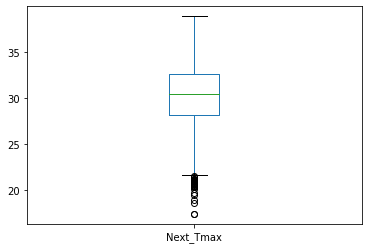

In [97]:
df['Next_Tmax'].plot.box()

As per above observation,there is an outlier.

<AxesSubplot:>

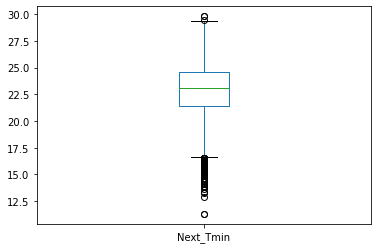

In [98]:
df['Next_Tmin'].plot.box()

As per above observation,there is an outlier.

<AxesSubplot:>

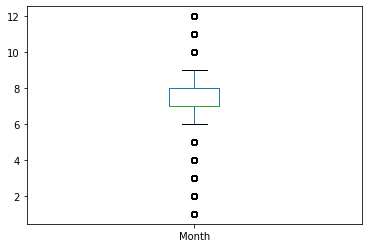

In [99]:
df['Month'].plot.box()

As per above observation,there is an outlier.

<AxesSubplot:>

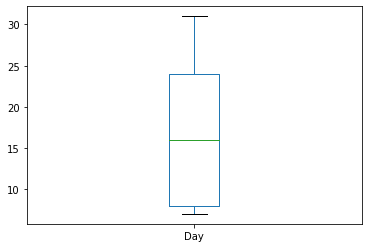

In [73]:
df['Day'].plot.box()

As per above observation,there is no outlier.

<AxesSubplot:>

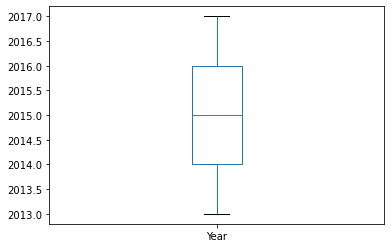

In [100]:
df['Year'].plot.box()

As per above observation,there is no outlier.

In [101]:
df.skew()

station             0.000000
Present_Tmax       -0.264137
Present_Tmin       -0.367538
LDAPS_RHmin         0.300220
LDAPS_RHmax        -0.855015
LDAPS_Tmax_lapse   -0.227880
LDAPS_Tmin_lapse   -0.581763
LDAPS_WS            1.579236
LDAPS_LH            0.678315
LDAPS_CC1           0.465003
LDAPS_CC2           0.477041
LDAPS_CC3           0.646670
LDAPS_CC4           0.673700
LDAPS_PPT1          5.393821
LDAPS_PPT2          5.775355
LDAPS_PPT3          6.457129
LDAPS_PPT4          6.825464
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.340200
Next_Tmin          -0.404447
Month              -0.705332
Day                 0.245514
Year                0.000000
dtype: float64

Findings skewed data from above observation:

LDAPS_RHmax ------       -0.855015

LDAPS_Tmin_lapse-----   -0.581763

LDAPS_WS ---------           1.579236

LDAPS_LH ---------           0.678315

LDAPS_CC3 --------          0.646670

LDAPS_CC4 --------          0.673700

LDAPS_PPT1 --------         5.393821

LDAPS_PPT2 ---------         5.775355

LDAPS_PPT3 ----------         6.457129

LDAPS_PPT4 ---------         6.825464

lat   ----------              0.087062

DEM   ---------              1.723257

Slope  ----------             1.563020

Solar radiation------    -0.511210

Month ---------             -0.705332



# Checking Normal distribution

In [102]:
df.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'Month', 'Day', 'Year'],
      dtype='object')

C:\Users\jhamu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='station', ylabel='Density'>

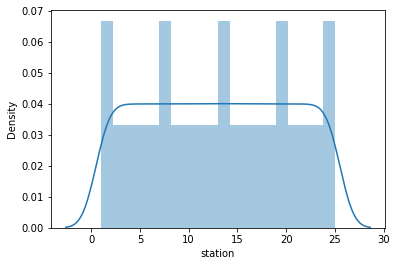

In [104]:
sns.distplot(df['station'])

As per above observation Normal distribution shows data is not skewed

C:\Users\jhamu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Present_Tmax', ylabel='Density'>

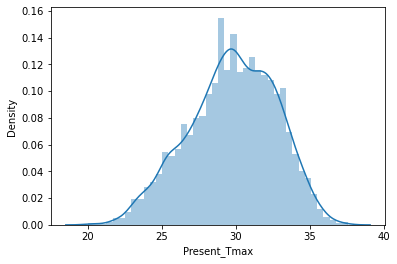

In [105]:
sns.distplot(df['Present_Tmax'])

As per above observation Normal distribution shows data is  skewed

C:\Users\jhamu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Present_Tmin', ylabel='Density'>

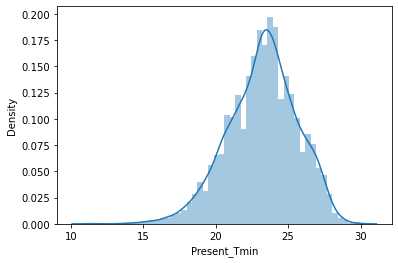

In [106]:
sns.distplot(df['Present_Tmin'])

As per above observation Normal distribution shows data is  skewed

C:\Users\jhamu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LDAPS_RHmin', ylabel='Density'>

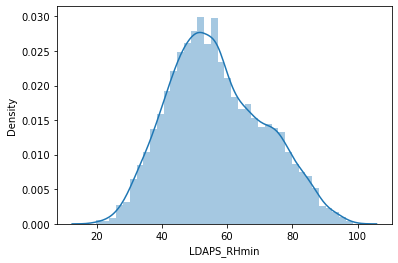

In [107]:
sns.distplot(df['LDAPS_RHmin'])

As per above observation Normal distribution shows data is not skewed

C:\Users\jhamu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LDAPS_RHmax', ylabel='Density'>

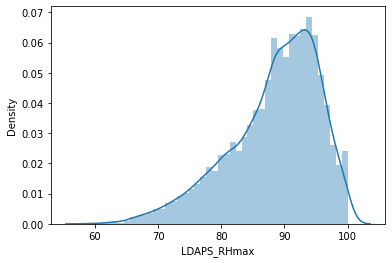

In [108]:
sns.distplot(df['LDAPS_RHmax']) 

As per above observation Normal distribution shows data is  skewed

C:\Users\jhamu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LDAPS_Tmax_lapse', ylabel='Density'>

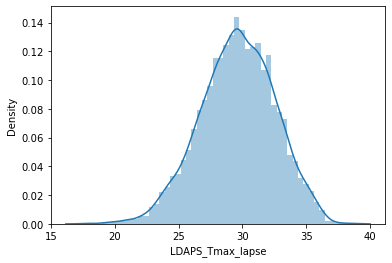

In [109]:
sns.distplot(df['LDAPS_Tmax_lapse'])

As per above observation Normal distribution shows data is not  skewed

C:\Users\jhamu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LDAPS_Tmin_lapse', ylabel='Density'>

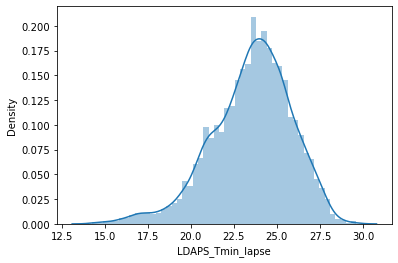

In [110]:
sns.distplot(df['LDAPS_Tmin_lapse'])

As per above observation Normal distribution shows data is  skewed

C:\Users\jhamu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LDAPS_WS', ylabel='Density'>

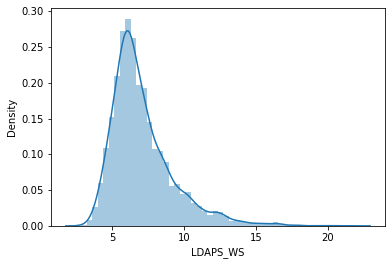

In [111]:
sns.distplot(df['LDAPS_WS'])

As per above observation Normal distribution shows data is  skewed

C:\Users\jhamu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LDAPS_LH', ylabel='Density'>

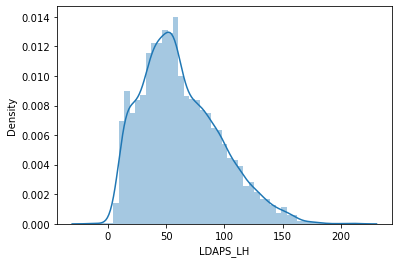

In [112]:
sns.distplot(df['LDAPS_LH'])

As per above observation Normal distribution shows data is  skewed

C:\Users\jhamu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LDAPS_CC1', ylabel='Density'>

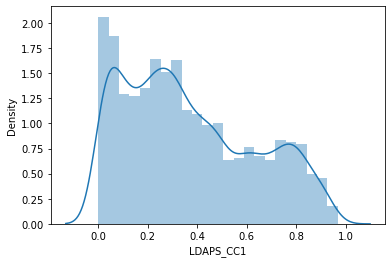

In [113]:
sns.distplot(df['LDAPS_CC1'])

As per above observation Normal distribution shows data is  skewed

C:\Users\jhamu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LDAPS_CC2', ylabel='Density'>

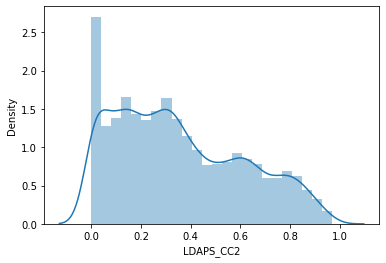

In [114]:
sns.distplot(df['LDAPS_CC2'])

As per above observation Normal distribution shows data is  skewed

C:\Users\jhamu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LDAPS_CC3', ylabel='Density'>

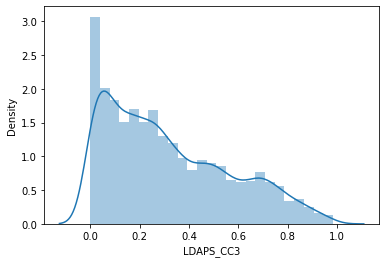

In [115]:
sns.distplot(df['LDAPS_CC3'])

As per above observation Normal distribution shows data is  skewed

C:\Users\jhamu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LDAPS_CC4', ylabel='Density'>

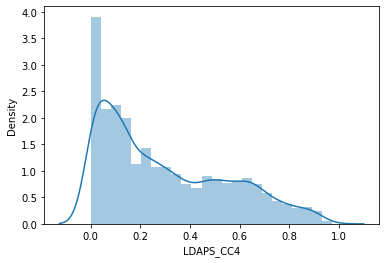

In [116]:
sns.distplot(df['LDAPS_CC4'])

As per above observation Normal distribution shows data is  skewed

C:\Users\jhamu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LDAPS_PPT1', ylabel='Density'>

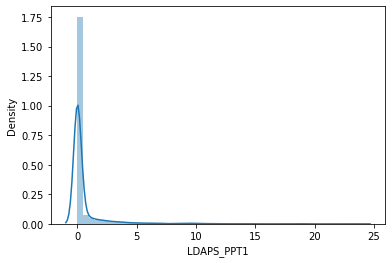

In [117]:
sns.distplot(df['LDAPS_PPT1'])

As per above observation Normal distribution shows data is  skewed

C:\Users\jhamu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LDAPS_PPT2', ylabel='Density'>

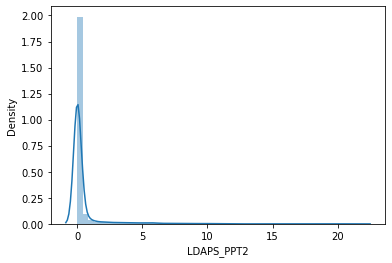

In [118]:
sns.distplot(df['LDAPS_PPT2'])

As per above observation Normal distribution shows data is  skewed

C:\Users\jhamu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LDAPS_PPT3', ylabel='Density'>

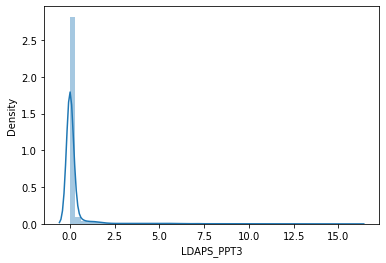

In [119]:
sns.distplot(df['LDAPS_PPT3'])

As per above observation Normal distribution shows data is  skewed

C:\Users\jhamu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LDAPS_PPT4', ylabel='Density'>

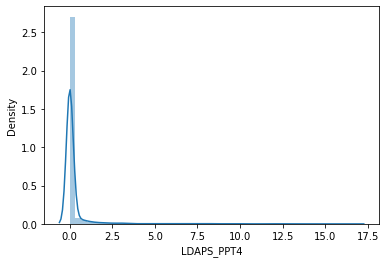

In [120]:
sns.distplot(df['LDAPS_PPT4'])

As per above observation Normal distribution shows data is  skewed

C:\Users\jhamu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='lat', ylabel='Density'>

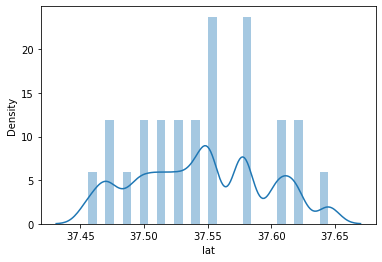

In [121]:
sns.distplot(df['lat'])

As per above observation Normal distribution shows data is  skewed

C:\Users\jhamu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='lon', ylabel='Density'>

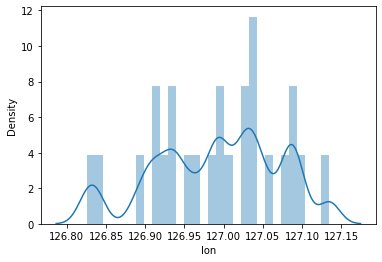

In [122]:
sns.distplot(df['lon'])

As per above observation Normal distribution shows data is  skewed

C:\Users\jhamu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DEM', ylabel='Density'>

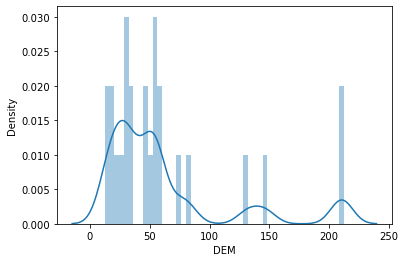

In [123]:
sns.distplot(df['DEM'])

As per above observation Normal distribution shows data is  skewed

C:\Users\jhamu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Slope', ylabel='Density'>

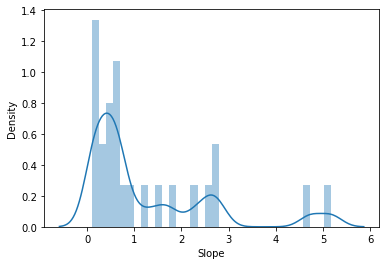

In [124]:
sns.distplot(df['Slope'])

As per above observation Normal distribution shows data is  skewed

C:\Users\jhamu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Solar radiation', ylabel='Density'>

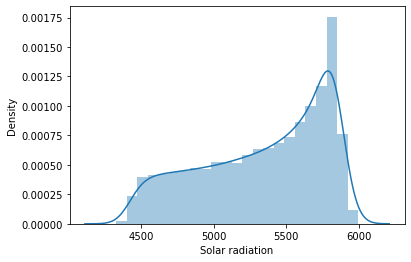

In [125]:
sns.distplot(df['Solar radiation'])

As per above observation Normal distribution shows data is  skewed

C:\Users\jhamu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Next_Tmax', ylabel='Density'>

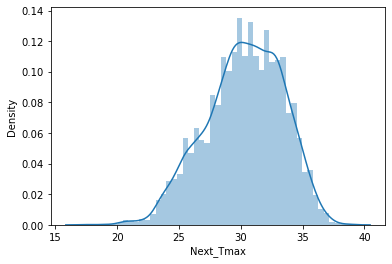

In [126]:
sns.distplot(df['Next_Tmax'])

As per above observation Normal distribution shows data is  skewed

C:\Users\jhamu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Next_Tmin', ylabel='Density'>

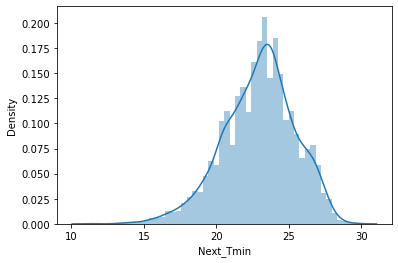

In [127]:
sns.distplot(df['Next_Tmin'])

As per above observation Normal distribution shows data is  skewed

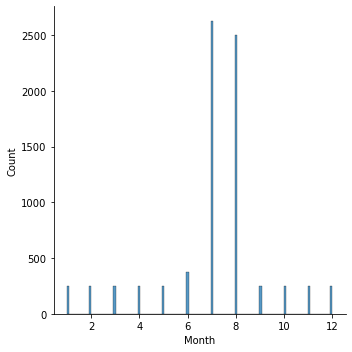

In [128]:
sns.displot(df['Month'])

As per above observation Normal distribution shows data is  skewed

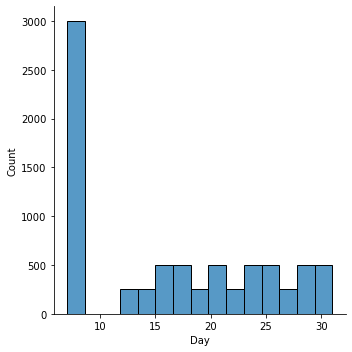

In [129]:
sns.displot(df['Day'])

As per above observation Normal distribution shows data is  skewed

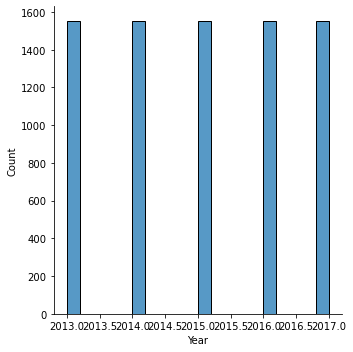

In [130]:
sns.displot(df['Year'])

As per above observation Normal distribution shows data is  not skewed

# Removing outlier

In [131]:
from scipy.stats import zscore
z = np.abs(zscore(df))
z.shape

(7752, 27)

In [132]:
#Using np.where function to check outlier points
print(np.where(z>3))

(array([  25,   25,   26, ..., 7751, 7751, 7751], dtype=int64), array([ 7, 14, 14, ..., 14, 15, 16], dtype=int64))


# data in range (-3,3)

In [133]:
df_new = df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(7752, 27)
(6894, 27)


#  loss of 11% of data after removing outlier

In [134]:
loss = (7752-6894)/7752*100
print(loss)

11.06811145510836


# dividing dataset into features and vector where x= features,y=vector

In [136]:
x = df_new.drop('Next_Tmax',axis=1)
y=df_new['Next_Tmax']

In [137]:
x

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmin,Month,Day,Year
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,21.2,6.0,30.0,2013.0
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,22.5,6.0,30.0,2013.0
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,23.9,6.0,30.0,2013.0
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,24.3,6.0,30.0,2013.0
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,22.5,6.0,30.0,2013.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,...,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,17.7,8.0,30.0,2017.0
7746,22.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,...,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,17.1,8.0,30.0,2017.0
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,18.1,8.0,30.0,2017.0
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,18.8,8.0,30.0,2017.0


In [ ]:
# Trying to get best random state

In [138]:
maxAcc = 0
maxRS = 0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    mod = LinearRegression()
    mod.fit(x_train,y_train)
    pred = mod.predict(x_test)
    acc = r2_score(pred,y_test)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print("Best r2_score is",maxAcc,"on best random_state",maxRS)        


Best r2_score is 0.7398944827375433 on best random_state 61


In [139]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=61)

# normalization of dataset

In [140]:
mm = MinMaxScaler()
x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)

# Linear regression

In [142]:
lr = LinearRegression()
lr.fit(x_train,y_train)
lr_pd = lr.predict(x_test)
r2_score(lr_pd,y_test)

0.7398944827375422

# Regularization

In [143]:
rd = Ridge()
rd.fit(x_train,y_train)
rd_pd = rd.predict(x_test)
r2_score(rd_pd,y_test)

0.737600120641521

# Ensemble technique

In [145]:
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr_pd = rfr.predict(x_test)
r2_score(rfr_pd,y_test)

0.8843553132845976

In [146]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtr_pd = dtr.predict(x_test)
r2_score(dtr_pd,y_test)

0.7697694498720461

In [147]:
xgb = XGBRegressor()
xgb.fit(x_train,y_train)
xgb_pd = xgb.predict(x_test)
r2_score(xgb_pd,y_test)

0.9125970334215688

# cross_validation

In [148]:
import warnings
warnings.filterwarnings('ignore')

In [149]:
print(cross_val_score(lr,x,y,cv=5).mean())

0.6835169246240144


In [150]:
print(cross_val_score(rd,x,y,cv=5).mean())

0.6836618139878443


In [151]:
print(cross_val_score(dtr,x,y,cv=5).mean())

0.4136384304897752


In [152]:
print(cross_val_score(rfr,x,y,cv=5).mean())

0.6734463655205121


In [153]:
print(cross_val_score(xgb,x,y,cv=5).mean())

0.654742348974309


As per above observation, Ridge regression is doing well because the difference between r2_score abd cross_val_score is lesser in comparison to other models.Hence we will go with Ridge regression

# Hyper parameter tuning

In [158]:
Parameters = {'max_iter':[500],
              'tol':[0.0001],
              'solver':['auto','svd','cholesky','lsqr','sparse_cg','sag','saga','lbfgs'],
              'random_state':[61],
              'alpha':[0.01,0.001,1,100]}

In [159]:
gsc = GridSearchCV(estimator=rd,param_grid=Parameters,cv=5)

In [160]:
gsc.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.001, 1, 100], 'max_iter': [500],
                         'random_state': [61],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga', 'lbfgs'],
                         'tol': [0.0001]})

# using best parameters to build model

In [161]:
gsc.best_params_

{'alpha': 0.01,
 'max_iter': 500,
 'random_state': 61,
 'solver': 'sparse_cg',
 'tol': 0.0001}

In [162]:
final_model = Ridge(alpha=0.01,max_iter=500,solver='sparse_cg',random_state= 61,tol=0.0001)
final_model.fit(x_train,y_train)
mod_pd = final_model.predict(x_test)
r2_score(mod_pd,y_test)

0.7398744351030743

# checking how my model is performing

In [163]:
a = np.array(y_test)
predicted = np.array(rd.predict(x_test))
df_com = pd.DataFrame({'Original':a,'predicted':predicted},index=range(len(a)))

In [164]:
df_com

,Original,predicted
0,26.1,26.149291
1,25.9,27.960180
2,26.3,27.668463
3,28.4,26.916848
4,28.7,30.381347
...,...,...
1374,28.5,28.128563
1375,28.4,29.391361
1376,27.2,27.701864
1377,25.6,28.429096


In [165]:
import joblib
joblib.dump(final_model,"Temperature_model_Next_Tmax")

['Temperature_model_Next_Tmax']

# Trying to predict through Next_Tmin: Next day  minimum temperature

# dividing dataset into features and vector where x= features,y=vector

In [166]:
X = df_new.drop('Next_Tmin',axis=1)
Y = df_new['Next_Tmin']

In [167]:
maxAcc = 0
maxRS = 0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=i)
    mod = LinearRegression()
    mod.fit(x_train,y_train)
    pred = mod.predict(x_test)
    acc = r2_score(pred,y_test)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print("Best r2_score is",maxAcc,"on best random_state",maxRS) 

Best r2_score is 0.828934931531188 on best random_state 67


In [168]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=67)

# normalization of dataset

In [169]:
mm = MinMaxScaler()
x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)

# Linear regression

In [170]:
l = LinearRegression()
l.fit(x_train,y_train)
l_pd = l.predict(x_test)
r2_score(l_pd,y_test)

0.8289349315311874

# Regularization technique

In [171]:
r = Ridge()
r.fit(x_train,y_train)
r_pd = r.predict(x_test)
r2_score(r_pd,y_test)

0.828051435205182

# Ensemble Technique

In [173]:
r1 = RandomForestRegressor()
r1.fit(x_train,y_train)
r1_pd = r1.predict(x_test)
r2_score(r1_pd,y_test)

0.8979855557552993

In [174]:
d = DecisionTreeRegressor()
d.fit(x_train,y_train)
d_pd = d.predict(x_test)
r2_score(d_pd,y_test)

0.7846766769065759

In [175]:
xg = XGBRegressor()
xg.fit(x_train,y_train)
xg_pd = xg.predict(x_test)
r2_score(xg_pd,y_test)

0.9286032710286587

# Cross_validation

In [176]:
print(cross_val_score(l,x,y,cv=5).mean())

0.6835169246240144


In [177]:
print(cross_val_score(r,x,y,cv=5).mean())

0.6739827818986889


In [178]:
print(cross_val_score(r1,x,y,cv=5).mean())

0.6746358880852104


In [179]:
print(cross_val_score(d,x,y,cv=5).mean())

0.4037938569984242


In [180]:
print(cross_val_score(xg,x,y,cv=5).mean())

0.654742348974309


As per above observation, Linear regression is doing well because the difference between r2_score abd cross_val_score is lesser in comparison to other models.Hence we will go with Linear regression

# Hyper parameter tuning

In [182]:
Parameters = {'fit_intercept':[True,False],
              'normalize':[True,False],
              'n_jobs':[1,-1],
              'positive':[True,False]}

In [183]:
gsc = GridSearchCV(estimator=l,param_grid=Parameters,cv=5)

In [184]:
gsc.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False], 'n_jobs': [1, -1],
                         'normalize': [True, False],
                         'positive': [True, False]})

# using best parameters to build model

In [185]:
gsc.best_params_

{'fit_intercept': True, 'n_jobs': 1, 'normalize': False, 'positive': False}

In [189]:
Final_model = LinearRegression(fit_intercept=True,n_jobs=1,normalize=False,positive= False)
Final_model.fit(x_train,y_train)
Mod_pd = Final_model.predict(x_test)
r2_score(Mod_pd,y_test)

0.8289349315311874

# checking how my model is performing against Original dataset

In [190]:
A = np.array(y_test)
predicted = np.array(l.predict(x_test))
df_com = pd.DataFrame({'Original':A,'predicted':predicted},index=range(len(A)))
df_com

,Original,predicted
0,24.0,23.398795
1,23.6,24.230286
2,23.6,24.161129
3,23.3,23.867879
4,23.7,24.480316
...,...,...
1374,21.0,21.953955
1375,21.6,20.820625
1376,26.4,26.130028
1377,23.1,22.693256


In [191]:
import joblib
joblib.dump(Final_model,"Temperature_model_Next_Tmin")

['Temperature_model_Next_Tmin']